***

<a id='beginning'></a> <!--\label{beginning}-->
* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [4. The Visibility space](4_0_introduction.ipynb)
    * Previous: [4.5.1 UV Coverage: UV tracks](4_5_1_uv_coverage_uv_tracks.ipynb)
    * Next: [4.6 The Fourier Approximation & the van Cittert-Zernike theorem](4_6_the_fourier_approximation_van_cittert-zernike_theorem.ipynb)

***

Import standard modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [3]:
from IPython.display import display
from ipywidgets import *
from mpl_toolkits.mplot3d import Axes3D
import plotBL

In [4]:
HTML('../style/code_toggle.html')

A Jupyter Widget

***

### 4.5.2 提高$uv$覆盖 $uv$ coverage : Improving your $uv$ coverage

在[$\S$ 4.5.1 &#10142;](4_5_1_uv_coverage_uv_tracks.ipynb)，我们探索了可见度函数的采样方式。根据干涉仪所在位置（纬度）、跟观测源有关的投影基线、以及观测时间和观测频率，我们沿着相应的uv轨迹对uv平面进行采样。uv轨迹呈由椭圆形弧段形状，观测过程中，沿着这些轨迹的采样累积起来，形成了uv覆盖。为了对天空进行精确测量，我们需要知道可见度函数的信息，尽可能地对uv平面进行完整采样。

In [$\S$ 4.5.1 &#10142;](4_5_1_uv_coverage_uv_tracks.ipynb), we have explored the ways in which the visibility function is sampled. Depending on the interferometer's location (in latitude), the projected baseline w.r.t. the observed source, and the time and frequency of our observation, the $uv$ plane is sampled along tracks which can be derived from the projected baseline in the ($u$,$v$,$w$) reference frame. These $uv$ tracks are portions of ellipses. Over the course of an observation, samples are accumulated along these tracks and form the *$uv$ coverage*.
To accurately measure the sky, we need a good knowledge of its attendant visibility function: we therefore need to sample the $uv$-plane as fully as possible.

<span style="background-color:cyan">TLG:GM: Check if the italic words are in the glossary. </span>

接下来会看到，我们是如何利用多元干涉仪([$\S$ 4.5.2.1 &#10549;](#vis:sec:4521))，以及时间([$\S$ 4.5.2.2 &#10549;](#vis:sec:4522))和频率([$\S$ 4.5.2.3 &#10549;](#vis:sec:4523))的积分来提高$uv$覆盖。

We will see, in this section, how the $uv$ coverage can be improved using multiple element interferometers ([$\S$ 4.5.2.1 &#10549;](#vis:sec:4521))  and using time ([$\S$ 4.5.2.2 &#10549;](#vis:sec:4522)) and frequency ([$\S$ 4.5.2.3 &#10549;](#vis:sec:4523)) integration to our advantage.

<a id="vis:sec:4521"></a> <!---\label{vis:sec:4521}--->
#### 4.5.2.1 $N$元干涉仪配置 Configuration of an $N$-element interferometer

到目前为止，我们只讨论了二元干涉仪。实际上，干涉仪不止由两个天线构成。对于由N个天线构成的干涉仪，我们针对每个频道、每个时间步长、每个极化，要做$\frac{N(N-1)}{2}$次互相关计算，因此，N元干涉仪在$uv$平面上的采样数量约为$\sim N^2$。

Until now, we only considered 2-element interferometers. In practice, interferometers are built from $N>2$  elements. We then compute the corresponding $\frac{N(N-1)}{2}$ independent cross-correlations (doing this for each frequency channel, each time step and each polarization). For an $N$-element interferometer, the sampling in the $uv$ plane is thus proportional to $\sim N^2$.

接下来，我们将列出一些众所周知、已经建成的干涉仪，绘制出它们在单个频率和单个时间步长的uv覆盖（即快照模式）。你可以从以下列表任选一个阵列：

In the following, we will show the characteristic $uv$ coverage of existing, well-known radio interferometers, observing at a single frequency and for a single time step (i.e. a *snapshot* observation). You may select the array of your choice from the list below:

In [19]:
config = widgets.Dropdown(
    options={'VLAa':'configs/vlaa.enu.txt',
        'VLAb':'configs/vlab.enu.txt',
        'VLAc':'configs/vlac.enu.txt',
        'VLAd':'configs/vlad.enu.txt',
        'WSRT':'configs/wsrt.enu.txt',
        'kat7':'configs/kat-7.enu.txt',
        'meerkat':'configs/meerkat.enu.txt'},
    value="configs/vlaa.enu.txt",
    Description="Antennas:")

display(config)

A Jupyter Widget

你可以从上面的下拉列表中选择一个真实设备，然而，如果你想自己在$ENU$参考系下定义自己的天线位置，则可以编辑下面的代码，并把变量"custom" 的值设置为"1"。

From the list above, you can select different configurations corresponding to real instrumental layouts.
However, if you want to specify the relative positions of the antennas in an $ENU$ reference frame yourself, you can edit the following block and set the variable "custom" to "1".

In [20]:
# you need to re-evaluate this box if you modify the array.
antennaPosition=np.genfromtxt(config.value)


In [21]:
# custom antenna distribution
custom=0
if (custom):
    antennaPosition = np.zeros((10, 2), dtype=float)
    antennaPosition[0,:] = [0,0]
    antennaPosition[1,:] = [-4, 5]
    antennaPosition[2,:] = [4, 5]
    antennaPosition[3,:] = [-10,0]
    antennaPosition[4,:] = [-8,-3]
    antennaPosition[5,:] = [-4,-5]
    antennaPosition[6,:] = [0,-6]
    antennaPosition[7,:] = [4,-5]
    antennaPosition[8,:] = [8,-3]
    antennaPosition[9,:] = [10,0]

下面绘出选定（或自定义）干涉仪的天线布局：

Let's plot the distribution of the antennas from the selected (or customized) interferometer:

/Users/denghui/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Antenna positions')

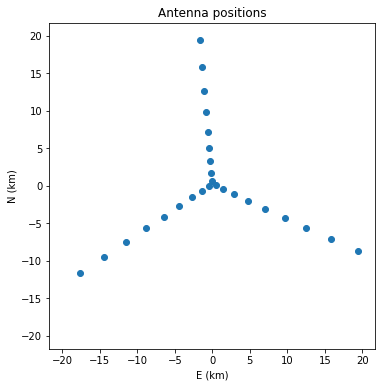

In [22]:
%matplotlib inline
mxabs = np.max(abs(antennaPosition[:]))*1.1;
# make use of pylab librery to plot
fig=plt.figure(figsize=(6,6))
plt.plot((antennaPosition[:,0]-np.mean(antennaPosition[:,0]))/1e3, \
         (antennaPosition[:,1]-np.mean(antennaPosition[:,1]))/1e3, 'o')
plt.axes().set_aspect('equal')
plt.xlim(-mxabs/1e3, mxabs/1e3)
plt.ylim(-mxabs/1e3, (mxabs+5)/1e3)
plt.xlabel("E (km)")
plt.ylabel("N (km)")
plt.title("Antenna positions")

<a id="fig:4414"></a>
**Figure 4.5.14**: $ENU$参考系下的天线布局。每个点代表一个天线。Distribution of the antennas in a $ENU$ reference frame. Each dot represents an antenna which will be part of $N$-1 baselines.

我们将用VLA对之前的模拟天空做一次模拟观测。

As for the previous simulations, we will simulate an observation using the VLA as the default case.

##### 4.5.2.1.1 观测配置 Observation configuration

In [9]:
# Observation parameters
c=3e8                                         # Speed of light
f=1420e6                                      # Frequency
lam = c/f                                     # Wavelength 

time_steps = 1200                              # time steps
h = np.linspace(-6,6,num=time_steps)*np.pi/12 # Hour angle window

# declination convert in radian

L = np.radians(34.0790)      # Latitude of the VLA
dec = np.radians(34.)

#### 4.5.2.1.2 快照模式的$\boldsymbol{uv}$覆盖  The *snapshot* $\boldsymbol{uv}$ coverage

/Users/denghui/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


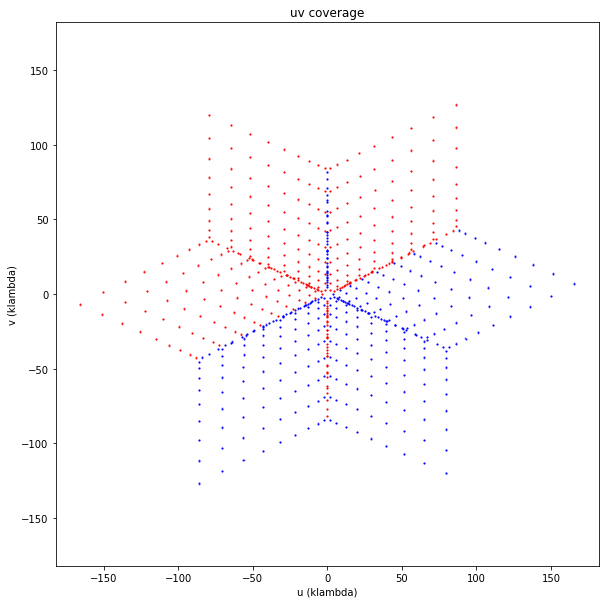

In [10]:
%matplotlib inline
Ntimes=3
plotBL.plotuv(antennaPosition,L,dec,h,Ntimes,lam)

<a id="vis:fig:4515"></a> <!---\label{vis:fig:4515}--->
**Figure 4.5.15**: 干涉仪的快照模式$uv$覆盖。红点和蓝点对应了对称的$uv$点：每条基线提供了一组可见度的测量值，即在($u$,$v$)处的可见度$V_\nu$和在($-u$,$-v$)处的复共轭可见度$V^*_\nu$。Snapshot $uv$ coverage of the interferometer. Red and blue points correspond to symmetric $uv$ points: indeed, each baseline gives us the measurement of $V_\nu$ at ($u$,$v$) __and__ its complex conjugate $V^*_\nu$ at ($-u$,$-v$).

根据天线的数量和天线的相对分布，干涉仪的快照uv覆盖的形状可能有很大差异。相比于瞬时覆盖紧凑的天线布局，瞬时覆盖面积大、覆盖了整个uv平面的天线布局（如VLA，图 [Fig. 4.5.15 &#10549;]）更受欢迎。随着总灵敏度的提升，提升瞬时uv覆盖成为了增加天线数量优化天线布局的主要动因。充分、平滑地采样能让我们获得“优良”的uv覆盖。在下一节，我们将讨论地球的自转对提升uv覆盖的贡献。

Depending on the number of elements and their relative distribution on the ground, the shape of the snapshot $uv$ coverage can vary dramatically from one interferometer to another. One may prefer an antenna distribution which maximizes an instantaneous coverage which spans the entire $uv$ plane (e.g. VLA in [Fig. 4.5.15 &#10549;](#vis:fig:4515)) rather than a compact array which samples a smaller portion of the $uv$ plane. With the raw increase of total sensitivity, improving the instantaneous $uv$ coverage is the main motivation for increasing the number of antennas and optimising their relative positions. A *good* $uv$ coverage is obtained if the $uv$ plane is sufficiently - and smoothly! - sampled. In the next section, we will see how the Earth contributes to improve the $uv$ coverage.

<a id="vis:sec:4522"></a> <!---\label{vis:sec:4522}--->
#### 4.5.2.3 时间积分：地球自转合成  Time integration: Earth Rotation Synthesis

如果要对一个源做连续几个小时的观测，则需要对该源进行条纹（或者延迟）跟踪。随着源在空中的运动，投影基线（从源的角度看）将顺着椭圆$uv$轨迹不断发生变化。只要采样时间足够，就有可能对uv轨迹进行充分采样，积累获得$\frac{N(N-1)}{2}\times N_\text{times}$个独立的可见度测量结果。

Observing a source for several hours requires tracking this source with fringe (or delay) tracking. As the source moves with the sky, the projected baselines - as seen from the source - will continuously vary along elliptical $uv$ tracks.
With good enough time sampling, it is possible to sample each $uv$ track along the observation and accumulate a number of $\frac{N(N-1)}{2}\times N_\text{times}$ independent measurements.

以下实验允许我们改变观测的时间步长（time steps），从一次快照观测到连续12小时观测。

The following experiment will allow you to change the number of time steps collected during an observation, from a snapshot observation up to a 12 hour observation.

下面的代码将首先绘出一次快照观测。你可以拖动下面的滑动条来增加观测的时间，并计算出相应的 $uv$ 覆盖。为了方便比较，新的$uv$ 覆盖图将直接放在原图的下面。

The next block will let you plot a snapshot observation. You can increase the duration of the observation with the slider which defines the total number of time steps for which the $uv$ coverage is computed. When using the slider, the new resulting plot will be generated next to the previous one to allow for visual comparisons.

（测试 time steps=2，300，1200三种情况下的$uv$ 覆盖结果。时间设置的越长，notebook需要的计算和成图时间越长。）

(Test values of 2, $\sim$300, $\sim$1200 to see the effects on the $uv$ coverage. Give the notebook some time to regenerate the plot, especially for large values of time samples!).

/Users/denghui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: on_trait_change is deprecated in traitlets 4.1: use observe instead
  # Remove the CWD from sys.path while we load stuff.


A Jupyter Widget

Ntimes=2


/Users/denghui/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


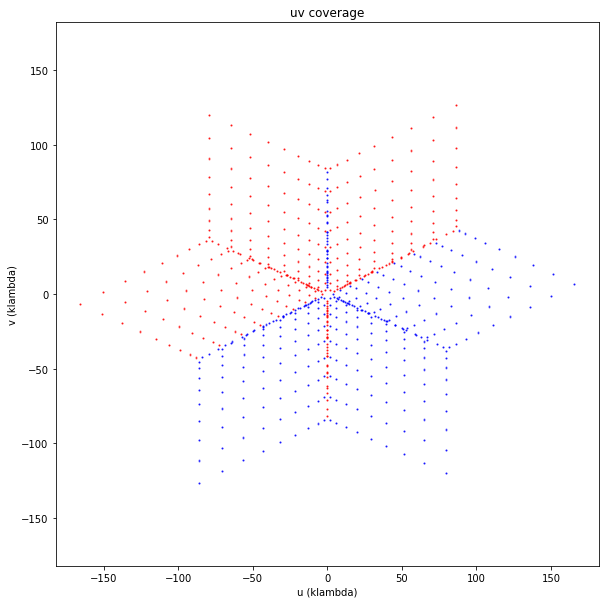

Ntimes=202


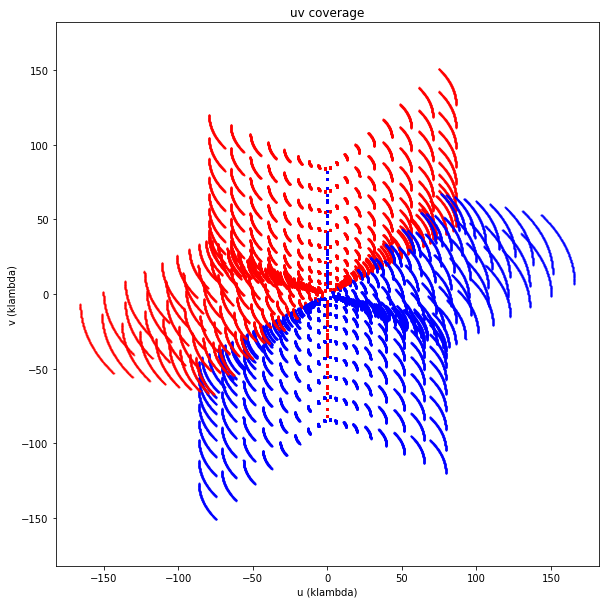

In [24]:
from ipywidgets import *
from IPython.display import display

def Interactplot(key,Ntimes):
    print("Ntimes="+str(Ntimes))
    plotBL.plotuv(antennaPosition,L,dec,h,Ntimes,lam)
    
slider=IntSlider(description="Ntimes",min=2,max=1200,step=100,continuous_update=False)

slider.on_trait_change(Interactplot,'value')
display(slider)
Interactplot("",2)

<a id="fig:4416"></a>
**Figure 4.5.16**: 不同采样时间下干涉仪的$uv$ 覆盖，红色和蓝色对应对称的$uv$点，因为每条基线对应一组可见度测量，即在($u$,$v$)处的可见度$V_\nu$和在($-u$,$-v$)处的复共轭可见度$V^*_\nu$。Sampled $uv$ coverage of the interferometer for various values of time samples. Red and blue points corresponds to symmetric $uv$ points, since each baseline give us the measurement of $V_\nu$ at ($u$,$v$) **and** its complex conjugate $V^*_\nu$ at ($-u$,$-v$).

随着时间步数的增加，你开始看到在uv平面上每条基线的椭圆形轨迹。容易看出，观测时间越长，可见度函数采样越好。

With an increasing number of time steps, you can start to see each individual baselines' elliptical $uv$ track in the $uv$ plane. It is easy to see that the longer the observation, the better our sampling of the visibility function.

<a id="vis:sec:4523"></a> <!---\label{vis:sec:4523}--->
#### 4.5.2.3 频率积分：频率合成  Integration in frequency: Frequency Synthesis

我们已经在[$\S$ 4.3 &#10142;](4_2_The_2-element_Interferometer.ipynb)看到，$u$、$v$、$w$ 坐标通常会被$\lambda$归一化，因此，用同一个干涉仪对不同频率进行观测，会得到一组不同的空间频率测量值。同一条基线在uv平面上对两个不同频率进行采样，相当于是对投影基线进行“缩放”。事实上，同一条基线对波长$\lambda_1$和$\lambda_2$做快照观测，$\lambda_2$的uv覆盖相当于是 $\lambda_1$的缩放版本。

We have seen in [$\S$ 4.3 &#10142;](4_2_The_2-element_Interferometer.ipynb) that the $u$, $v$, $w$ coordinates are usually normalized by $\lambda$. As a consequence, observing with the *same* interferometer at a *different* frequency gives a different set of spatial frequencies. Sampling the ($u,v$)-plane with the same baseline and two diffe frequencies is equivalent to **rescaling** the projected baseline. Indeed, for the same snapshot $uv$ coverage at wavelength $\lambda_1$, the $uv$ coverage at $\lambda_2 < \lambda_1$ will be a shrunk version of that a $\lambda_1$. 

如果采样频率连续或者准连续，比如，观测系统在[$f_\text{min}$,$f_\text{max}$]的带宽范围内的$N_\text{freqs}$个频道上工作，我们在$uv$平面上能得到$\frac{N(N-1)}{2}\times N_\text{freqs}$个独立测量值。由于这种$u$ 和 $v$的频率缩放效果，每条基线都将生成一条径向的轨迹。

If the distribution of our sampling frequencies is (quasi) continuous, e.g. if the observing system operates in a bandwidth [$f_\text{min}$,$f_\text{max}$], with $N_\text{freqs}$ channels, we can contiguously sample portions of the $uv$ plane with $\frac{N(N-1)}{2}\times N_\text{freqs}$ independent measurements. For each baseline, a radial track will be generated due to the frequency scaling effect of $u$ and $v$.

<div class=warn>
<b>Warning:</b> It is only possible to do this up to a point: see *bandwidth smearing* in [$\S$ 9.3 &#10142;](../9_Practical/9_3_observing_smearing.ipynb)) for more details on the limits of this technique.
</div>
<span style="background-color:cyan">TLG:GM: Check if the italic words are in the glossary. </span>

下面的代码将绘出一次快照观测。拖动滑动条增加连续频道数量（步长为10MHz），每改变一次滑动条的数值，将生出一幅新的uv覆盖图（注意，notebook画图需要时间）（你可以拖动下面的滑动条来增加观测的时间，并计算出相应的 $uv$ 覆盖。

In the next block, we will plot a snapshot observation. You can increase the number of continuous frequency channels  (at 10 MHz steps) with the slider. Upon a change on the slider, a new plot will be generated next to the previous one, to allow visual comparisons (Note: give the notebook some time to generate the plot).

（测试频道数=1，20，200三种情况下的$uv$ 覆盖结果）

(Test values of 1, 20, 200 to see the effects on the $uv$ coverage).

/Users/denghui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: on_trait_change is deprecated in traitlets 4.1: use observe instead
  if sys.path[0] == '':


A Jupyter Widget

Nfreqs=1


/Users/denghui/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


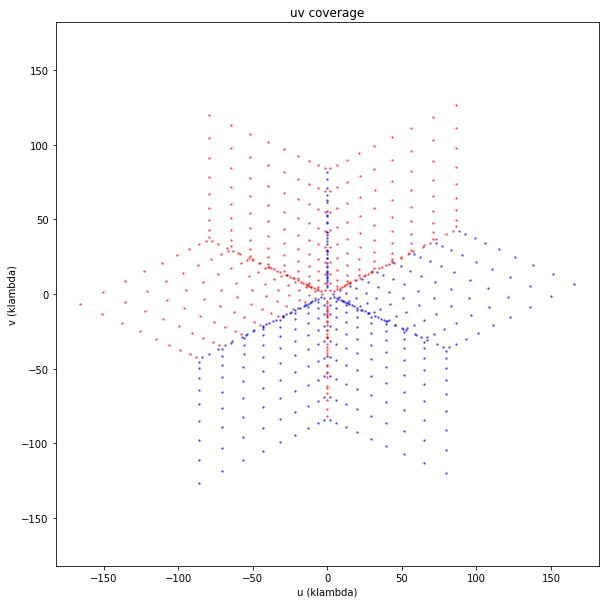

Nfreqs=29


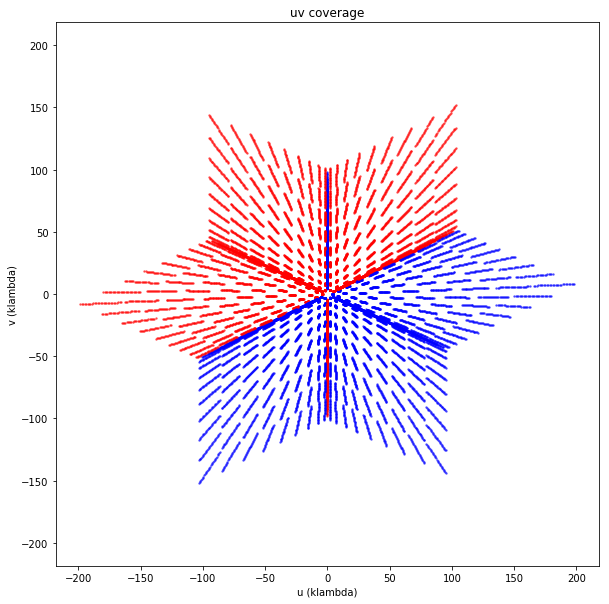

In [25]:
df=10e6 # frequency step
f0=c/lam # starting frequency
lamb0=lam # starting wavelength


def Interactplot(key,Nfreqs):
    print("Nfreqs="+str(Nfreqs))
    plotBL.plotuv_freq(antennaPosition,L,dec,h,Nfreqs,lamb0,df)
    
slider=IntSlider(description="Nfreqs",min=1,max=200,step=1,continuous_update=False)

slider.on_trait_change(Interactplot,'value')
display(slider)
Interactplot("",1)

<a id="fig:4417"></a>
**Figure 4.5.17**: 不同频道数量下干涉仪的$uv$ 覆盖，红色和蓝色点对应对称的$uv$点，因为每条基线给出一组可见度测量，即在($u$,$v$)处的可见度$V_\nu$和在($-u$,$-v$)处的复共轭可见度$V^*_\nu$。Snapshot $uv$ coverage of the interferometer for various numbers of frequency channels. Red and blue points corresponds to symmetric $uv$ points, since each baseline give us the measurement of $V_\nu$ at ($u$,$v$) **and** its complex conjugate $V^*_\nu$ at ($-u$,$-v$).

可以看到，随着频道数量的增加，每条基线在uv平面上留下一条径向轨迹。显而易见，频道数越多，可见度函数采样越好（至少理论如此）。

With an increasing number of frequency channels, you can see each individual baseline following a radial track on the $uv$-plane. It is easy to see that the more frequency channels you allocate to an observation, the better the sampling of the visibility function (theoretically at least!).

#### 4.5.2.4 结论 Conclusion

$uv$平面是干涉仪实际的采样平面。

The $uv$ plane is what an interferometers actually measures.

理想情况下，$uv$平面等效于可见度函数，这正是我们想要测量的。而$uv$覆盖则告诉了我们要对哪些可见度函数进行采样。

In an ideal case, this plane is equivalent to the visibility function, which what we **want** to measure. The $uv$-coverage of an observation tells us which parts of the visibility function has been sampled.

在[$\S$ 4.5.1 &#10142;](4_5_1_uv_coverage_uv_tracks.ipynb)，我们展示了单条基线的椭圆形采样轨迹。如果知道了干涉仪的地理位置、源的方向以及基线参数，我们就能预知该轨迹的参数。因此，$uv$轨迹是单条基线在观测过程中的空间频率（即uv点）采样路径。

In [$\S$ 4.5.1 &#10142;](4_5_1_uv_coverage_uv_tracks.ipynb), we showed that sampling the $uv$-plane with a single baseline amounts to sampling along an elliptical track due to the rotation of the Earth. The track's parameters can be predicted if we know the location of the interferometer on Earth, the direction of the source and the baseline characteristics. The $uv$-track is thus the set of spatial frequencies (i.e.$uv$ points) which a single baseline will sample over the course of an observation.

在[$\S$ 4.5.2 &#10549;](4_5_2_uv_coverage_improving_your_coverage.ipynb)，我们讨论了uv覆盖的三种方法：1、增加天线数量、优化天线布局：该方法提高的是uv的瞬时空间覆盖；2、利用观测源与天球一起旋转这一事实。该事实导致投影基线不断变化，因此相应的uv坐标也不断变化，我们因此得到了椭圆形uv轨迹的采样。长时间积分以较小代价提高了uv覆盖，但是导致了计算量的增长；3、使用宽带接收机，在多个频率上采样，计算不同频道的互相关，从而在径向上提高uv覆盖。

In [$\S$ 4.5.2 &#10549;](4_5_2_uv_coverage_improving_your_coverage.ipynb), we discussed three different ways of improving your $uv$ coverage. Firstly, we can increase the number of antennas and alter their distribution: this improves the *instantaneous* spatial coverage. Second, we can use the fact that the observed source is moving with the Celestial Sphere (i.e. the Earth spins). The continuous variation of the projected baseline - and therefore its $u,v$-coordinates - allow us to sample portions of elliptical $uv$ tracks. 

A long integration time allows astronomers to easily improve their $uv$-plane coverage at little cost. Note that maximising using this technique to improve $uv$-coverage will require taking more measurements in time, thus increasing computational costs.

Thirdly, by using broadband receivers, we can sample the visibilities at various frequencies and compute the cross-correlations in different frequency channels. By doing so, the $uv$-coverage is improved along radial $uv$ tracks.

当然，上述三种方法不能任意扩展uv覆盖，它们受限于仪器的灵敏度和仪器的点源响应（参见 [$\S$ 9.3 &#10142;](../9_Practical/9_3_Observing_smearing.ipynb))。

Of course, these methods cannot extend our $uv$-coverage arbitrarily. They are limited by both the instrument sensitivity and the instrument's point source response (see [$\S$ 9.3 &#10142;](../9_Practical/9_3_Observing_smearing.ipynb)).

在 [$\S$ 4.6  &#10142;](4_6_the_fourier_approximation_van_cittert-zernike_theorem.ipynb)，我们将进一步阐明前一节内容所依赖的基础假设，在讨论“成像”[$\S$ 5 &#10142;](../5_Imaging/5_0_introduction.ipynb)之前，必须要先了解这方面的知识。

In [$\S$ 4.6  &#10142;](4_6_the_fourier_approximation_van_cittert-zernike_theorem.ipynb) we will explicitly enunciate the underlying hypotheses we relied on in the previous section. This section is required before we can begin to treat the topic of *imaging* in [$\S$ 5 &#10142;](../5_Imaging/5_0_introduction.ipynb).

<p class=conclusion>
<font size=4><b>要点</b></font>
<br>
<br>
&bull; 天线数量及其非冗余分布对提高快照uv覆盖至关重要。<br>
&bull; 利用地球自转的时间合成（文献上被称为“超级合成”的技术）构建每条基线的椭圆形uv轨迹，但同时也会产生<em>时间拖影</em>。<br>
&bull; 频率合成有助于提高径向上的uv覆盖，但同时也会带来<em>频率拖影</em>。<br>
</p>

<p class=conclusion>
<font size=4><b>Important things to remember</b></font>
<br>
<br>
&bull; The number of antennas and their non-redundant distribution are important factors to improve the *snapshot* $uv$ coverage.<br>
&bull; Time integration using Earth Rotation Synthesis (a technique known in the literature as *supersynthesis*) builds up the elliptical $uv$ tracks of each baseline, but generates <em>time smearing</em>.<br>
&bull; Frequency integration - observing in a larger bandwidth composed of multiple contiguous channels - also helps improve the $uv$ coverage radially, but generates <em>frequency smearing</em>.<br>
</p>

#### Format status:

* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : LF: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : NC: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : RF: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : HF: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : GM: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : CC: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : CL: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : ST: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : FN: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : TC: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : XX: 09/02/2017

***

* Next: [4.6 The Fourier Approximation & the van Cittert-Zernike theorem](4_6_the_fourier_approximation_van_cittert-zernike_theorem.ipynb)